# Analysis and predicting on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. 

This data was originally a part of UCI Machine Learning Repository and has been removed now. 

We can also access this data from the scikit-learn library. 

There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [0]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

For each key:
* data: contains the information for various houses
* target: prices of the house
* feature_names: names of the features
* DESCR: describes the dataset

In [0]:
# detailed description of the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [0]:
# load the data into a pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [0]:
boston['MEDV'] = boston_dataset.target

## Data preprocessing

In [0]:
# check if there are any missing values in the data
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

However, there are no missing values in this dataset.

## Exploratory Data Analysis

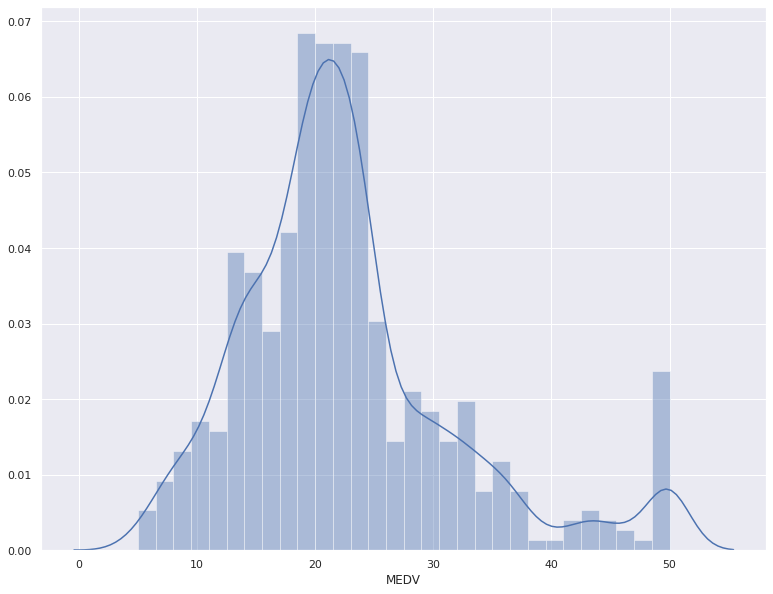

In [0]:
# plot the distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers, ranging from \$5,000 to \$50,000.

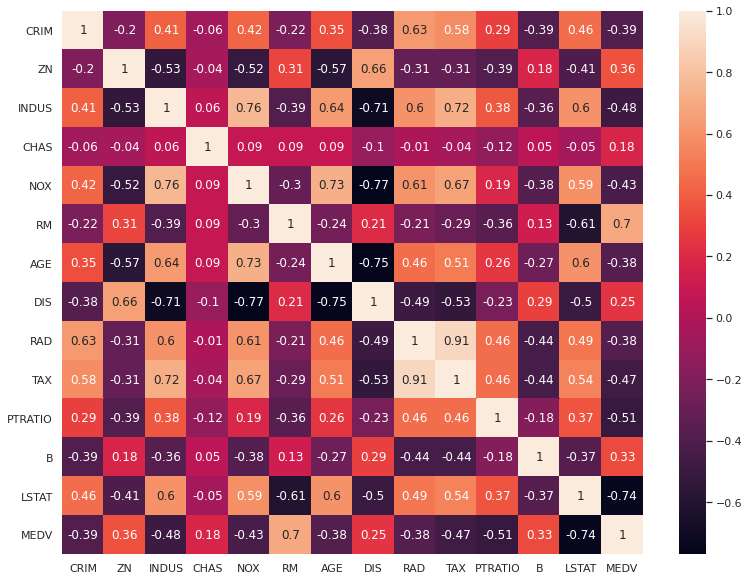

In [0]:
# create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.


**Observations:**
* To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
* An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

Based on the above observations we will use RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

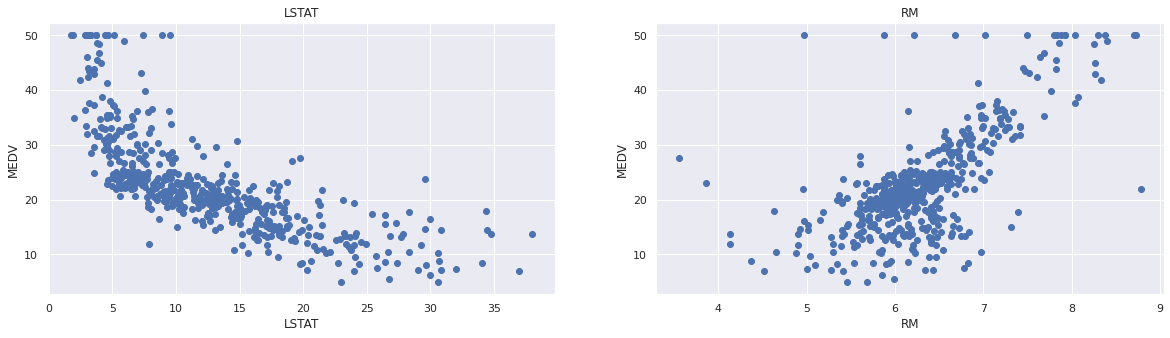

In [0]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations:**

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

## Training and predicting

In [0]:
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [0]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [0]:
# Training and testing the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import r2_score
# Model evaluation

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


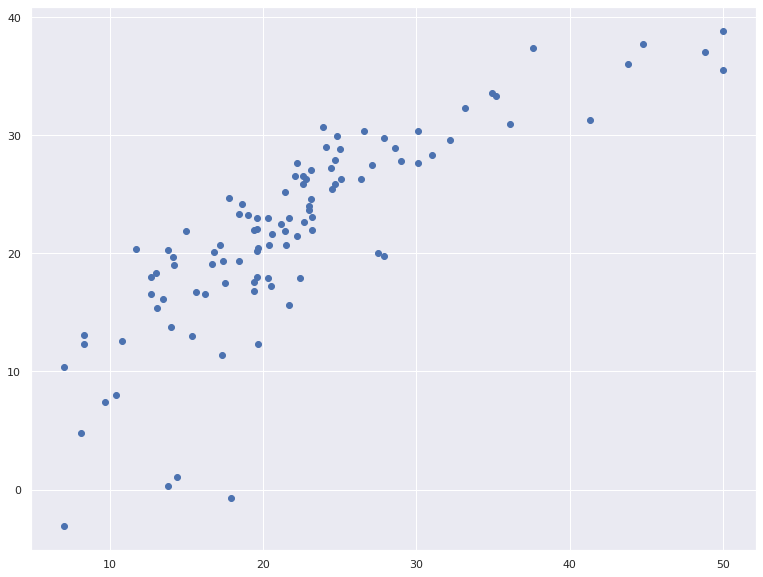

In [0]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

Except for a few outliers, it shows that we could use linear regression model to effectively predict the median prices of houses in Boston.

## Summary

The dataset we use contains 13 features of Boston Housing.  

Since we were planning to use linear regression to build a model for MEDV (median value of owner-occupied homes in $1000's) in Boston, we calculate the correlation coefficient of all 13 features against MEDV.  

As a result, we choose two features (RM and LSTAT) that have strong correlation with MEDV.

Using these two features, we successfully build a linear regression model that could predict MEDV with RM and LSTAT.